# TP11: Clasificación
## Sebastian Carreño Marin - 2024

**El programa propuesto clasifica entre las siguientes clases:**

- **auto**

- **bicicleta**

- **moto**

**Para ello, se hace uso de 40 imágenes de cada clase para el entrenamiento. En el testeo se usan 6 imágenes de cada una.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Se importan las librerías**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Se descomprime el dataset**

In [4]:
!unzip "/content/drive/My Drive/Colab Notebooks/dataset_Auto_Moto_Bici"

Archive:  /content/drive/My Drive/Colab Notebooks/dataset_Auto_Moto_Bici.zip
   creating: dataset_Auto_Moto_Bici/
   creating: dataset_Auto_Moto_Bici/train/
   creating: dataset_Auto_Moto_Bici/train/moto/
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (210).jpeg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (1).jpeg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (1).jpg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (1).png  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (2).jpeg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (2).jpg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (2).png  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (3).jpeg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (211).jpeg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (3).png  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (4).jpeg  
  inflating: dataset_Auto_Moto_Bici/train/moto/Bike (214).jpeg  
  inflating: dataset_Auto_Moto_Bici/tr

**Se crea una clase que se usa para crear los dataset. Luego, se crea el conjunto de entrenaiento y el del test**

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.05)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/dataset_Auto_Moto_Bici/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/dataset_Auto_Moto_Bici/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 120 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


**Se corroboran las etiquetas para cada clase**

In [6]:
class_indices = training_set.class_indices
print(class_indices)

{'auto': 0, 'bici': 1, 'moto': 2}


**Se crea el modelo**

In [7]:
from os import WEXITED

num_clases = 3

model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(64, 64, interpolation='bilinear'),
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(rate=.25),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(num_clases, activation='softmax')
])



optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)


model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Se entrena el modelo en el conjunto de entrenamiento**

In [8]:
model.fit(training_set, epochs = 40)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 [==============================] - 3s 417ms/step - loss: 1.1438 - accuracy: 0.2833
Epoch 2/40
4/4 [==============================] - 2s 488ms/step - loss: 1.0436 - accuracy: 0.3333
Epoch 3/40
4/4 [==============================] - 2s 346ms/step - loss: 0.9832 - accuracy: 0.4083
Epoch 4/40
4/4 [==============================] - 1s 284ms/step - loss: 0.9094 - accuracy: 0.7333
Epoch 5/40
4/4 [==============================] - 1s 334ms/step - loss: 0.8609 - accuracy: 0.7417
Epoch 6/40
4/4 [==============================] - 1s 325ms/step - loss: 0.7782 - accuracy: 0.7917
Epoch 7/40
4/4 [==============================] - 1s 339ms/step - loss: 0.7090 - accuracy: 0.7500
Epoch 8/40
4/4 [==============================] - 1s 311ms/step - loss: 0.6619 - accuracy: 0.7917
Epoch 9/40
4/4 [==============================] - 2s 477ms/step - loss: 0.5941 - accuracy: 0.8417
Epoch 10/40
4/4 [==============================] - 2s 457ms/step - loss: 0.5397 - accuracy: 0.8167
Epoch 11/40
4/4 [=============

**Se evalúa el modelo con el conjunto de test**

In [11]:
model.evaluate(test_set)

1/1 [==============================] - 0s 121ms/step - loss: 0.6643 - accuracy: 0.7778


[0.6642727255821228, 0.7777777910232544]

**Se evalúa sobre algunas imágenes del conjunto de fotos de test**

In [12]:
print("Las etiquetas son: ", class_indices, "\n" )
b = test_set.next()
print(b[1][0:5])
model.predict(b[0][0:5])

Las etiquetas son:  {'auto': 0, 'bici': 1, 'moto': 2} 

[2. 0. 2. 0. 1.]
1/1 [==============================] - 0s 29ms/step


array([[3.8223833e-01, 5.5734017e-03, 6.1218822e-01],
       [9.7695756e-01, 2.2854453e-02, 1.8801003e-04],
       [2.9147876e-04, 1.5381499e-01, 8.4589356e-01],
       [9.7157794e-01, 9.7444840e-04, 2.7447639e-02],
       [1.7005089e-01, 3.1903252e-01, 5.1091653e-01]], dtype=float32)

**Se evalúa con imágenes individuales**

1/1 [==============================] - 0s 22ms/step

Prob. para img1: [[0.03237819 0.07280914 0.89481264]]
Prob. para img2: [[0.7109252  0.00432963 0.28474513]]
Prob. para img3: [[0.03398526 0.89485836 0.07115638]]

La imagen 1 es: moto
La imagen 2 es: auto
La imagen 3 es: bici



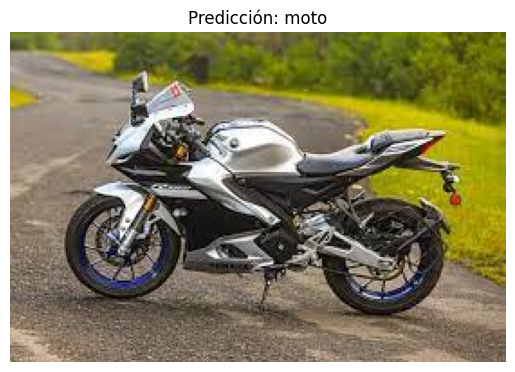

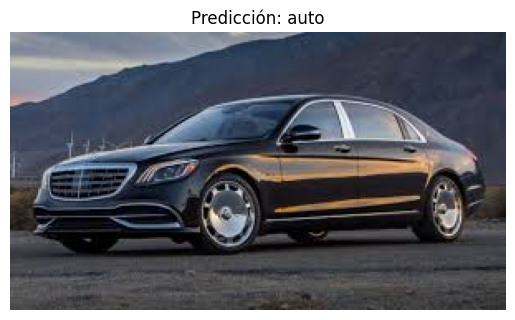

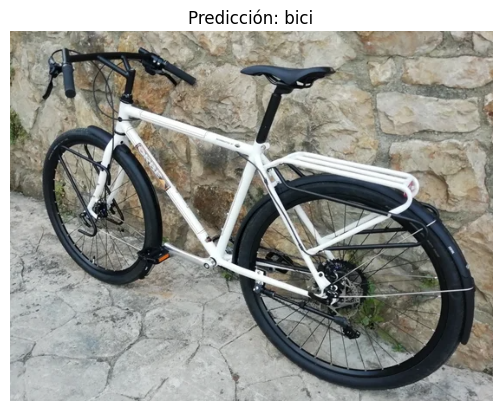

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

###########################################################################################################################
def carga_y_procesa_img(img_path):
    img = image.load_img(img_path, target_size=(64, 64)) # Carga la imagen y la redimensiona
    img_array = image.img_to_array(img)                  # Convierte a numpy array
    img_array = np.expand_dims(img_array, axis=0)        # Expande las dim. para que coincidan con la entrada del modelo
    img_array = img_array / 255.0                        # Normaliza
    return img_array

###########################################################################################################################
def clasifica(pred):
    if pred[0][0] > pred[0][1] and  pred[0][0] > pred[0][2] :
        return "auto"
    elif pred[0][1] > pred[0][0] and  pred[0][1] > pred[0][2] :
        return "bici"
    else:
        return "moto"


##################################################### MAIN #################################################################
#dir_img1 = "/content/dataset_Auto_Moto_Bici/test_indiv/Bike (319).jpeg"
dir_img1 = "/content/dataset_Auto_Moto_Bici/test_indiv/Bike (294).jpeg"

#dir_img2 = "/content/dataset_Auto_Moto_Bici/test_indiv/Car (380).jpeg"
dir_img2 = "/content/dataset_Auto_Moto_Bici/test_indiv/Car (428).jpeg"

#dir_img3 = "/content/dataset_Auto_Moto_Bici/test_indiv/bici70.png"
dir_img3 = "/content/dataset_Auto_Moto_Bici/test_indiv/bici69.png"


#Procesa (acorde a cómo se entrenó la red) imágenes individuales
img1_moto = carga_y_procesa_img(dir_img1)
img2_auto = carga_y_procesa_img(dir_img2)
img3_bici = carga_y_procesa_img(dir_img3)


#Se introducen las imágenes al modelo
pred1 = model.predict(img1_moto)
pred2 = model.predict(img2_auto)
pred3 = model.predict(img3_bici)

#Imprime probabilidades
print("\nProb. para img1: {}".format(pred1))
print("Prob. para img2: {}".format(pred2))
print("Prob. para img3: {}".format(pred3)+"\n")

#Imprime la clasificación
print(f'La imagen 1 es: {clasifica(pred1)}')
print(f'La imagen 2 es: {clasifica(pred2)}')
print(f'La imagen 3 es: {clasifica(pred3)}' + "\n")

#Muestra las imágenes
plt.imshow(image.load_img(dir_img1))
plt.title(f'Predicción: {clasifica(pred1)}')
plt.axis('off')
plt.show()

plt.imshow(image.load_img(dir_img2))
plt.title(f'Predicción: {clasifica(pred2)}')
plt.axis('off')
plt.show()

plt.imshow(image.load_img(dir_img3))
plt.title(f'Predicción: {clasifica(pred3)}')
plt.axis('off')
plt.show()


